In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time


# Pricing d'une option européenne vanille : Méthode analytique par Black-Scholes

In [46]:
#Initialisation des paramètres de la formule de Black Scholes :

S = 100.0  # Option price
K = 100.0  # Strike price
r = 0.05   # Risk-free rate (5%)
sigma = 0.2    # Volatility of the underlying (20%) cette valeur est la plus difficile à évaluer en pratique
T = 1.0

In [47]:
def density_gaussian(x) :
    return norm.pdf(x,0,1)

def repartition_gaussian(y) :
    return norm.cdf(y)

In [48]:
repartition_gaussian(10)

1.0

In [49]:
#D'après la formule de Black-Scholes, il nous faut calculer d'abord les d1/d2

def d1(S,K,r,sigma,T) :
    return (np.log(S/K)+(r+(sigma**2)/2)*T)/sigma*T**(1/2)

def d2(sigma,T) :
    return d1(S,K,r,sigma,T)-sigma*T**(1/2)


In [50]:
d1(S,K,r,sigma,T)

0.35000000000000003

In [51]:
d2(sigma,T)

0.15000000000000002

In [52]:
#Passons maintenant au calcul du cull/put avec la formumule de Black-Scholes:

def call_price(S,K,r,T,sigma) :
    return S*repartition_gaussian(d1(S,K,r,sigma,T))-K*np.exp(-r*T)*repartition_gaussian(d2(sigma,T))

def put_price(S,K,r,T,sigma) :
    return -S*repartition_gaussian(-d1(S,K,r,sigma,T))+K*np.exp(-r*T)*repartition_gaussian(-d2(sigma,T))

In [54]:
start_time = time.time()

print("Prix du call d'après les paramètres : " + " " + str(call_price(S,K,r,T,sigma)) + "\n" + "Prix du put d'après les paramètres :" + " " + str(put_price(S,K,r,T,sigma) ))
print("Temps d'execution :" + " " + "%s seconds" % (time.time() - start_time) )



Prix du call d'après les paramètres :  10.450583572185565
Prix du put d'après les paramètres : 5.573526022256971
Temps d'execution : 0.0019931793212890625 seconds


C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_2276/2956566709.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.log(S/K)+(r+(sigma**2)/2)*T)/sigma*T**(1/2)


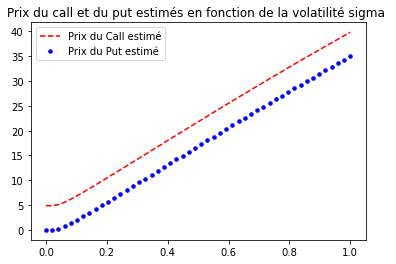

In [45]:
V = np.linspace(0.0,1.0,num=50)
call = []
put = []
for i in range(50) :
    sigma = V[i]
    call.append(call_price(S,K,r,T,sigma))
    put.append(put_price(S,K,r,T,sigma))



plt.plot(V, call, 'r--', label="Prix du Call estimé")
plt.plot(V, put, 'bo', markersize=3.5, label="Prix du Put estimé")
plt.legend()

plt.title("Prix du call et du put estimés en fonction de la volatilité sigma ")




plt.show()

# Pricing d'une option européenne vanille : Méthode Monte Carlo